In [1]:
# Import dataset and column names
import pandas as pd
from sklearn.utils import shuffle

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
cols = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shuck_weight', 'viscera_weight', 'shell_weight', 'rings']

dataset = pd.read_csv(data_url, names=cols)
#dataset = shuffle(dataset)
dataset.head()

,sex,length,diameter,height,whole_weight,shuck_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
dataset.shape

(4177, 9)

In [3]:
dataset.describe()

,length,diameter,height,whole_weight,shuck_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shuck_weight    4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


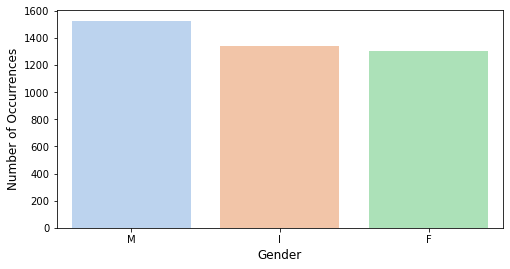

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sex_level = dataset['sex'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(sex_level.index, sex_level.values, alpha=0.8, palette="pastel")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [6]:
# Sex ratio in abalone
print("\nPercentage")
print(dataset.sex.value_counts(normalize = True)*100)
print("\nNumbers")
print(dataset.sex.value_counts())


Percentage
M    36.581278
I    32.128322
F    31.290400
Name: sex, dtype: float64

Numbers
M    1528
I    1342
F    1307
Name: sex, dtype: int64


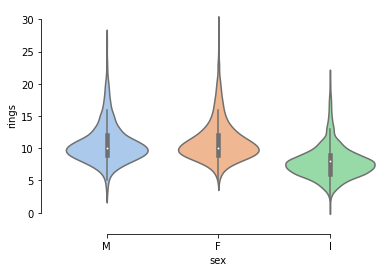

In [7]:
import seaborn as sns

# Sex and Age Visulization
plot = sns.violinplot(x="sex", y="rings", data=dataset, palette="pastel")
sns.despine(offset=10, trim=True)

According to the graph above:

    Male: Majority Between 7.5 to 19
    Female: Majority Between 8 to 19
    Infant: Majority Between 6 to < 10
        
The actual difference between Males and Females is insignificant in regard to number of rings. Differences, however, emerge when we considered the “I” category - Abalones that are Infants and unable to be categorized by sex. Unsexed infantiles do appear to predict a smaller number of rings - but this is not due to a function of sex, but rather a function of their young age (younger = fewer rings).

In [8]:
X = dataset.drop("sex", axis=1)
Y = dataset["sex"]

# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC

svc = SVC(gamma=0.0001)
svc.fit(X, Y)
svc.score(X, Y)

0.5149628920277711

In [9]:
from sklearn.model_selection import train_test_split

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
svc = SVC(gamma=0.0001)
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.5358851674641149

In [11]:
# Take a best guess at the hyper parameters to use

cost = 1.0 # Penalty parameter of the error term
gamma = 0.5 # Defines the influence of input vectors on the margins

In [12]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Test linear, rbf, sigmoid and poly kernels
for k in ('linear', 'rbf', 'sigmoid', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost).fit(X_train, y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), y_test))

linear
              precision    recall  f1-score   support

           F       0.01      0.67      0.03         6
           I       0.84      0.70      0.77       320
           M       0.81      0.47      0.60       510

    accuracy                           0.56       836
   macro avg       0.56      0.61      0.46       836
weighted avg       0.82      0.56      0.66       836

rbf
              precision    recall  f1-score   support

           F       0.27      0.44      0.33       165
           I       0.78      0.74      0.76       282
           M       0.58      0.44      0.51       389

    accuracy                           0.54       836
   macro avg       0.54      0.54      0.53       836
weighted avg       0.59      0.54      0.56       836

sigmoid
              precision    recall  f1-score   support

           F       0.00      0.00      0.00         0
           I       0.00      0.00      0.00         0
           M       1.00      0.35      0.52       836

 

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


poly
              precision    recall  f1-score   support

           F       0.28      0.45      0.35       173
           I       0.85      0.67      0.75       340
           M       0.51      0.47      0.49       323

    accuracy                           0.55       836
   macro avg       0.55      0.53      0.53       836
weighted avg       0.60      0.55      0.57       836

